# Chapter 1


In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm

np.random.seed(0)

## P.18 比率の検定

サイコロを模したサンプリング

In [2]:
dice = list(range(1, 7))
sample = np.random.choice(dice) # pick 1 sample
print(sample)

5


サンプリング結果は実行毎にことなる

In [3]:
sample = np.random.choice(dice) # pick 1 sample
print(sample)
sample = np.random.choice(dice) # pick 1 sample
print(sample)
sample = np.random.choice(dice) # pick 1 sample
print(sample)

6
1
4


サイコロを10, 100, 1000回振って，そのヒストグラムを可視化\
結果は一様分布に近似していく

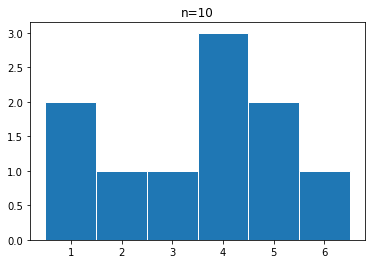

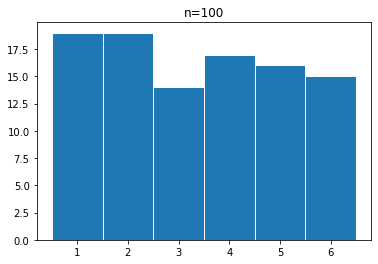

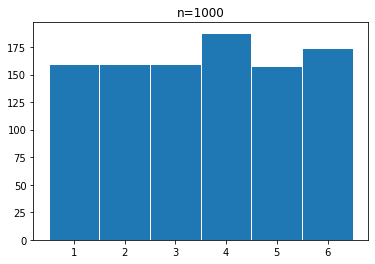

In [4]:
n = 10
samples = np.random.choice(dice, size=n)
plt.hist(samples, bins=np.arange(7)+0.5, edgecolor='w')
plt.title('n=10')
plt.show()

n = 100
samples = np.random.choice(dice, size=n)
plt.hist(samples, bins=np.arange(7)+0.5, edgecolor='w')
plt.title('n=100')

plt.show()

n = 1000
samples = np.random.choice(dice, size=n)
plt.hist(samples, bins=np.arange(7)+0.5, edgecolor='w')
plt.title('n=1000')
plt.show()

サイコロをn回投げて，1の目が何回出たかを数える．その偏りを検定する\
二項分布の理論分布はscipyのbinomを用いて計算し，1の目が出た回数r以上となる確率を求める\
最終的に1の目がr回以上出る確率が表示されるので，この値に応じて帰無仮説を棄却できるかどうかが変わる\
この例では，サイコロの分布が偏っていないことに注意

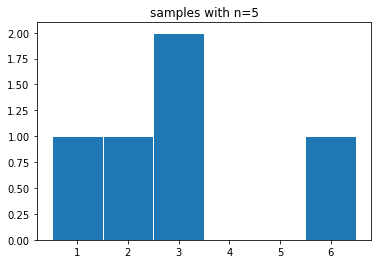

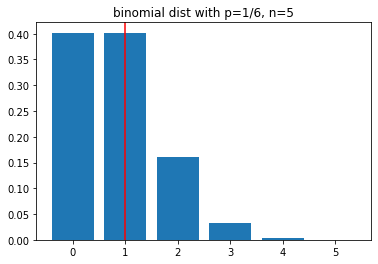

Prob(pip1 appeares more than 1) : 0.5981224279835389


In [5]:
# Sample and visualize data
n = 5
samples = np.random.choice(dice, size=n)
plt.hist(samples, bins=np.arange(7)+0.5, edgecolor='w')
plt.title('samples with n=' + str(n))
plt.show()

# Calc statistic value r (counting samples==1)
r = np.sum(samples == 1)

# Calc theoretical distribution (binomial) and visualize it
p_dice = 1/6 # prob for dice   
k = np.arange(n+1)
dist_bin = binom.pmf(k, n, p_dice)
plt.bar(k, dist_bin)
plt.axvline(x=r, ymin=0, ymax=1, color='red') # add vertical line with x=r
plt.title('binomial dist with p=1/6, n=' + str(n))
plt.show()

# Calc probability by summing pmf >= r
prob = sum(dist_bin[r:])
print('Prob(pip1 appeares more than ' + str(r) + ') : '  + str(prob))

## イメージレッスン(p20)
p20の図は二項分布のnを変えて可視化しているものだが，これをサンプリングによって再現してみる\
n回のサンプリングを10000回繰り返して，1の目の平均値をプロット\
(Nの数を大きくすればするほど，テキストの理論分布に近づく)

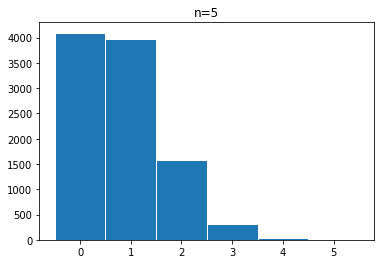

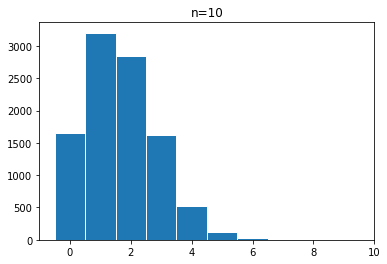

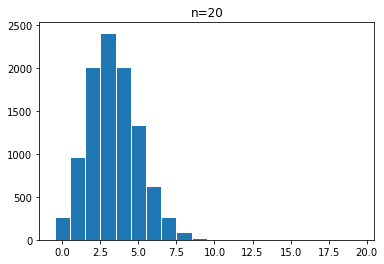

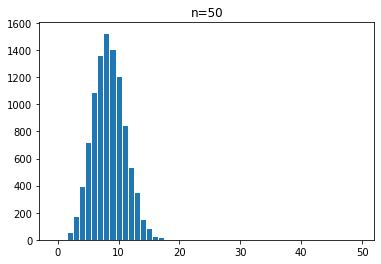

In [6]:
N = 10000 # Total iteration for each n

n = 5 # #samples
samples = np.random.choice(dice, size=[N,n]) # sample N x n samples
count1 = np.count_nonzero(samples==1, axis=1) # Count #1pips column-wise
plt.hist(count1, bins=np.arange(-1,6)+0.5, edgecolor='w')
plt.title('n=5')
plt.show()

n = 10 # #samples
samples = np.random.choice(dice, size=[N,n]) # sample N x n samples
count1 = np.count_nonzero(samples==1, axis=1) # Count #1pips column-wise
plt.hist(count1, bins=np.arange(-1,10)+0.5, edgecolor='w')
plt.title('n=10')
plt.show()

n = 20 # #samples
samples = np.random.choice(dice, size=[N,n]) # sample N x n samples
count1 = np.count_nonzero(samples==1, axis=1) # Count #1pips column-wise
plt.hist(count1, bins=np.arange(-1,20)+0.5, edgecolor='w')
plt.title('n=20')
plt.show()

n = 50 # #samples
samples = np.random.choice(dice, size=[N,n]) # sample N x n samples
count1 = np.count_nonzero(samples==1, axis=1) # Count #1pips column-wise
plt.hist(count1, bins=np.arange(-1,50)+0.5, edgecolor='w')
plt.title('n=50')
plt.show()

## おまけ
上記の検定では，サイコロの真の分布が偏っていない場合である\
ここでは，サイコロが本当は偏っていると仮定した場合を考えてみる\
偏りは，それぞれの1から6の出目が[.5, .1, .1, .1, .1, .1]とする\
nを増やせば，ほぼ確実に帰無仮説が棄却される．

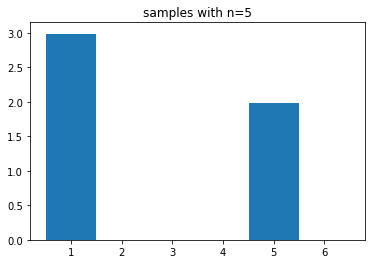

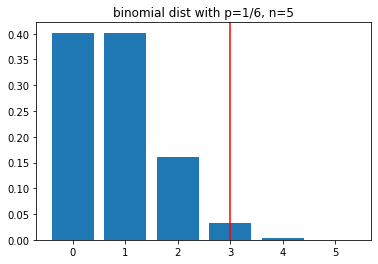

Prob(pip1 appeares more than 3) : 0.035493827160493804


In [7]:
# Define prob of distorted dice
pdice = [.5, .1, .1, .1, .1, .1]

# Sample and visualize data
n = 5
samples = np.random.choice(dice, size=n, p=pdice)
plt.hist(samples, bins=np.arange(7)+0.5, edgecolor='w')
plt.title('samples with n=' + str(n))
plt.show()

# Calc statistic value r (counting samples==1)
r = np.sum(samples == 1)

# Calc theoretical distribution (binomial) and visualize it
p_dice = 1/6 # prob for dice   
k = np.arange(n+1)
dist_bin = binom.pmf(k, n, p_dice)
plt.bar(k, dist_bin)
plt.axvline(x=r, ymin=0, ymax=1, color='red') # add vertical line with x=r
plt.title('binomial dist with p=1/6, n=' + str(n))
plt.show()

# Calc probability by summing pmf >= r
prob = sum(dist_bin[r:])
print('Prob(pip1 appeares more than ' + str(r) + ') : '  + str(prob))

## P.22 平均値の検定

正規分布からのサンプリング\
ここでは，あるクラスの身長の分布と母集団の分布が異なることを仮定

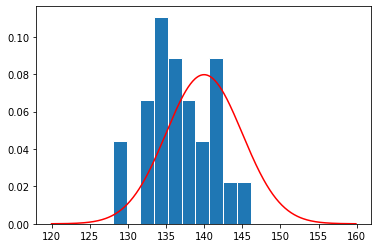

In [8]:
# Sampling distribution (mu=137)
n_sample = 25
mu_sample = 137
std_sample = 5
samples = np.random.normal(loc=mu_sample, scale=std_sample, size=(n_sample,1))
plt.hist(samples, edgecolor='w', density=True) # pdf

# Population distribution (mu=140)
mu_pop = 140
std_pop = 5
X = np.arange(120, 160, 0.1)
Y = norm.pdf(X, loc=mu_pop, scale=std_pop)
plt.plot(X, Y, color='red')
plt.show()

統計量（平均値）を求めて理論分布と比較する\
さらに，標準化した統計量を標準正規分布上にプロットし，両側検定で有意水準alpha=0.05とした場合の帰無仮説が棄却される領域を示す\
水色で塗りつぶされた領域にz値が位置していれば，帰無仮説は棄却される

mean of samples (xbar) : 136.69


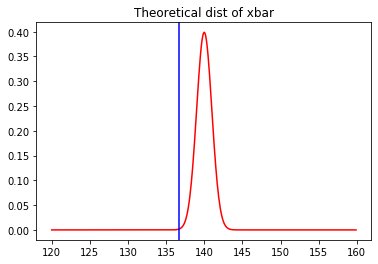

normalized xbar (z value) : -3.31


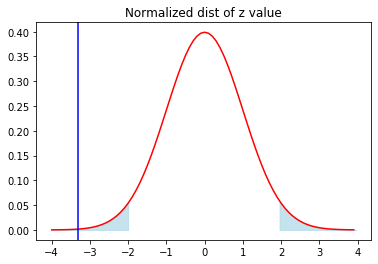

In [9]:
# Calc statistic value mean from samples
xbar = samples.mean()
print('mean of samples (xbar) : ' + format(xbar,'.2f'))

#  Plot theoretical dist of xbar with H0=true (mu=140)
X = np.arange(120, 160, 0.1)
Y = norm.pdf(X, loc=mu_pop, scale=std_pop/np.sqrt(n_sample))
plt.plot(X, Y, color='red')
plt.axvline(x=xbar, ymin=0, ymax=1, color='blue') # add vertical line with x=xbar
plt.title('Theoretical dist of xbar')
plt.show()

#  Normalize xbar
z = (xbar-mu_pop) / (std_pop/np.sqrt(n_sample))
print('normalized xbar (z value) : ' + format(z,'.2f'))

# Plot normalized dist and z val
X = np.arange(-4, 4, 0.1)
Y = norm.pdf(X, loc=0, scale=1)
plt.plot(X, Y, color='red')
plt.axvline(x=z, ymin=0, ymax=1, color='blue') # add vertical line with x=z
plt.title('Normalized dist of z value')

# Fill significance level
alpha = 0.05
lower_bound = norm.ppf(alpha/2, loc=0, scale=1)
Xlb = np.arange(-4, lower_bound, 0.1)
Ylb = norm.pdf(Xlb, loc=0, scale=1)
plt.fill_between(Xlb, Ylb, color="lightblue", alpha=0.7)

upper_bound = norm.ppf(1-alpha/2, loc=0, scale=1)
Xub = np.arange(upper_bound, 4, 0.1)
Yub = norm.pdf(Xub, loc=0, scale=1)
plt.fill_between(Xub, Yub, color="lightblue", alpha=0.7)


## イメージレッスン(P24)
標準正規分布からnサンプル抽出して，その平均値を求める\
これを10000回繰り返し，n=3,5,10,80の時の平均値の分布を求める\
この平均値の分布は，中心極限定理により，N(0,1/n)に従う

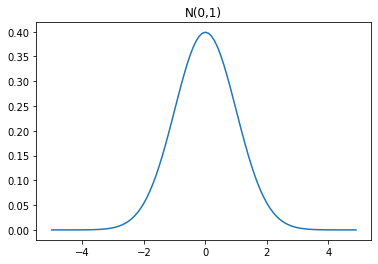

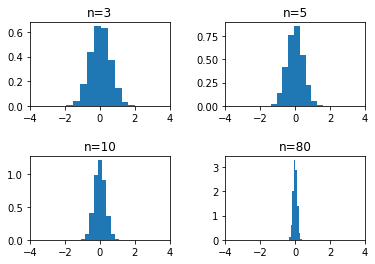

In [10]:
# Plot theoretical dist
X = np.arange(-5, 5, 0.1)
Y = norm.pdf(X, loc=0, scale=1)
plt.plot(X, Y)
plt.title('N(0,1)')
plt.show()

N = 10000 # Total iteration for each n

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
n = 3
samples = np.random.randn(n, N)
mu_samples = samples.mean(axis=0)
ax1.hist(mu_samples, density=True)
ax1.set_title('n=' + str(n))
ax1.set_xlim(-4, 4)

ax2 = fig.add_subplot(2, 2, 2)
n = 5
samples = np.random.randn(n, N)
mu_samples = samples.mean(axis=0)
ax2.hist(mu_samples, density=True)
ax2.set_title('n=' + str(n))
ax2.set_xlim(-4, 4)

ax3 = fig.add_subplot(2, 2, 3)
n = 10
samples = np.random.randn(n, N)
mu_samples = samples.mean(axis=0)
ax3.hist(mu_samples, density=True)
ax3.set_title('n=' + str(n))
ax3.set_xlim(-4, 4)

ax4 = fig.add_subplot(2, 2, 4)
n = 80
samples = np.random.randn(n, N)
mu_samples = samples.mean(axis=0)
ax4.hist(mu_samples, density=True)
ax4.set_title('n=' + str(n))
ax4.set_xlim(-4, 4)

fig.subplots_adjust(wspace=0.4, hspace=0.6)


## おまけ
上記のイメージレッスンでは，サンプルの従う分布を標準正規分布とした\
しかし実際はどんな分布からサンプルが生成されていても，中心極限定理によりその平均値の分布はN(mu, s^2/n)に従う\
ここでmuは母平均，s^2は母分散，nはサンプル数\
例として，母分布がベータ分布の場合をみてみる

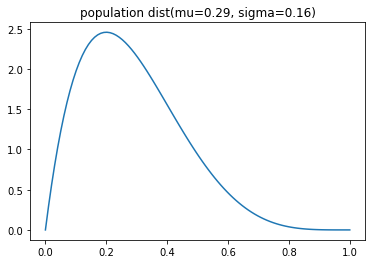

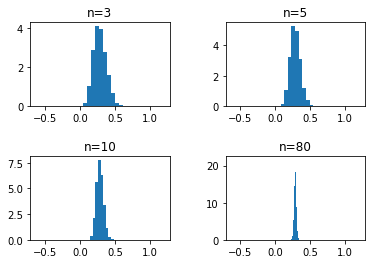

In [11]:
from scipy.stats import beta

# Define population distribtuion and plot it
frozen_beta = beta(2, 5)
X = np.linspace(0,1,100)
plt.plot(X, frozen_beta.pdf(X))
plt.title('population dist(mu=' + format(frozen_beta.mean(),'.2f') + ', sigma=' + format(frozen_beta.std(),'.2f') + ')')
plt.show()

N = 10000 # Total iteration for each n

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
n = 3
samples = frozen_beta.rvs((n,N))
mu_samples = samples.mean(axis=0)
ax1.hist(mu_samples, density=True)
ax1.set_title('n=' + str(n))
ax1.set_xlim(frozen_beta.mean()-1, frozen_beta.mean()+1)

ax2 = fig.add_subplot(2, 2, 2)
n = 5
samples = frozen_beta.rvs((n,N))
mu_samples = samples.mean(axis=0)
ax2.hist(mu_samples, density=True)
ax2.set_title('n=' + str(n))
ax2.set_xlim(frozen_beta.mean()-1, frozen_beta.mean()+1)

ax3 = fig.add_subplot(2, 2, 3)
n = 10
samples = frozen_beta.rvs((n,N))
mu_samples = samples.mean(axis=0)
ax3.hist(mu_samples, density=True)
ax3.set_title('n=' + str(n))
ax3.set_xlim(frozen_beta.mean()-1, frozen_beta.mean()+1)

ax4 = fig.add_subplot(2, 2, 4)
n = 80
samples = frozen_beta.rvs((n,N))
mu_samples = samples.mean(axis=0)
ax4.hist(mu_samples, density=True)
ax4.set_title('n=' + str(n))
ax4.set_xlim(frozen_beta.mean()-1, frozen_beta.mean()+1)

fig.subplots_adjust(wspace=0.4, hspace=0.6)

